In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = r"C:\Users\gonza\Downloads\Trending YouTube Video Statistics\USvideos.csv"
data = pd.read_csv(url,parse_dates=["trending_date","publish_time"])
data.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [3]:
data.tags[:10]

0                                      SHANtell martin
1    last week tonight trump presidency|"last week ...
2    racist superman|"rudy"|"mancuso"|"king"|"bach"...
3    rhett and link|"gmm"|"good mythical morning"|"...
4    ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...
5    ijustine|"week with iPhone X"|"iphone x"|"appl...
6    SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...
7    5 Ice Cream Gadgets|"Ice Cream"|"Cream Sandwic...
8    Trailer|"Hugh Jackman"|"Michelle Williams"|"Za...
9    vox.com|"vox"|"explain"|"shift change"|"future...
Name: tags, dtype: object

In [4]:
data.title[:10]

0                   WE WANT TO TALK ABOUT OUR MARRIAGE
1    The Trump Presidency: Last Week Tonight with J...
2    Racist Superman | Rudy Mancuso, King Bach & Le...
3                     Nickelback Lyrics: Real or Fake?
4                             I Dare You: GOING BALD!?
5                                2 Weeks with iPhone X
6            Roy Moore & Jeff Sessions Cold Open - SNL
7                  5 Ice Cream Gadgets put to the Test
8    The Greatest Showman | Official Trailer 2 [HD]...
9    Why the rise of the robots won’t mean the end ...
Name: title, dtype: object

In [5]:
# convertimos columna en datetime 
from datetime import datetime
data["trending_date"] = data["trending_date"].apply(lambda x : datetime.strptime(x,"%y.%d.%m"))

### limpieza texto

In [6]:
ejemplo = data.tags[1]
ejemplo

'last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"'

In [106]:
import re
x = re.sub('"|"',"",ejemplo)

In [107]:
x

'last week tonight trump presidency|last week tonight donald trump|john oliver trump|donald trump'

In [9]:
x.replace(r"|"," ")

'last week tonight trump presidency last week tonight donald trump john oliver trump donald trump'

In [10]:
def text_prepoc(x):
    X = x.lower()
    X = re.sub(r'"|"',"",X)
    X = X.replace("|"," ")
    return X

In [11]:
text_prepoc(ejemplo)

'last week tonight trump presidency last week tonight donald trump john oliver trump donald trump'

### Let's start looking if Views, likes, dislikes and comment counts have a normal distribuition

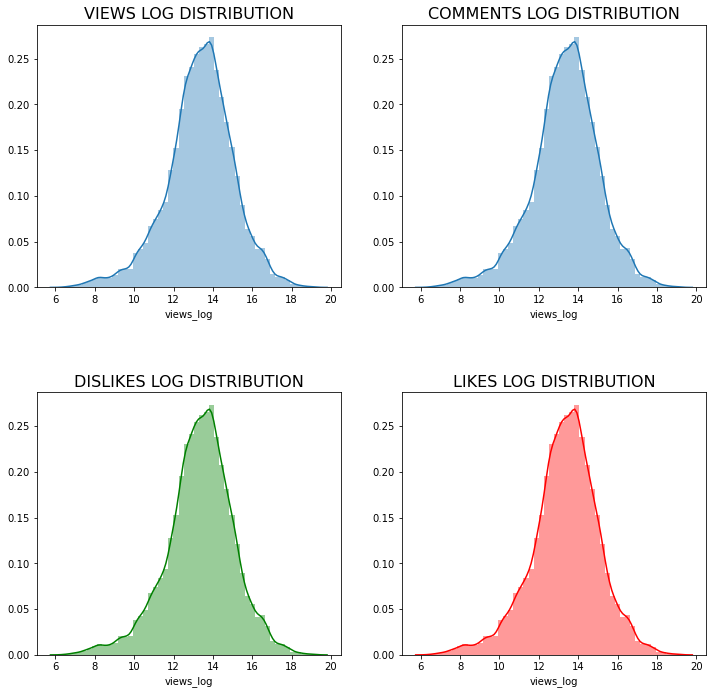

In [144]:
data["like_log"] = np.log(data["likes"] + 1)
data["views_log"] = np.log(data["views"] + 1)
data["dislikes_log"] = np.log(data["dislikes"] + 1)
data["comment_log"] = np.log(data["comment_count"] + 1)

plt.figure(figsize=(12,10))

plt.subplot(221)
g1 = sns.distplot(data["views_log"])
g1.set_title("VIEWS LOG DISTRIBUTION",fontsize=16)

plt.subplot(224)
g2 = sns.distplot(data["views_log"],color="r")
g2.set_title("LIKES LOG DISTRIBUTION",fontsize=16)

plt.subplot(223)
g3 = sns.distplot(data["views_log"],color="green")
g3.set_title("DISLIKES LOG DISTRIBUTION",fontsize=16)

plt.subplot(222)
g4 = sns.distplot(data["views_log"])
g4.set_title("COMMENTS LOG DISTRIBUTION",fontsize=16)

plt.subplots_adjust(wspace=0.2,hspace=0.4,top=1)

In [120]:
import json
url = r"C:\Users\gonza\Downloads\Trending YouTube Video Statistics\US_category_id.json"
with open(url) as f:
    data_json = json.load(f)["items"]



In [128]:
data_json[0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [140]:
# create a dict with titles
title_dict = {}
for cat in data_json:

    title_dict[int(cat["id"])] = cat["snippet"]["title"]
    title_dict

In [141]:
title_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}